Validation R2 Score: 0.7125917293633894
Mean Squared Error: 21.261260961054514

Final submission file created: submission.csv
   Id       MEDV
0   1  28.996724
1   2  36.025565
2   3  14.816944
3   4  25.031979
4   5  18.769880




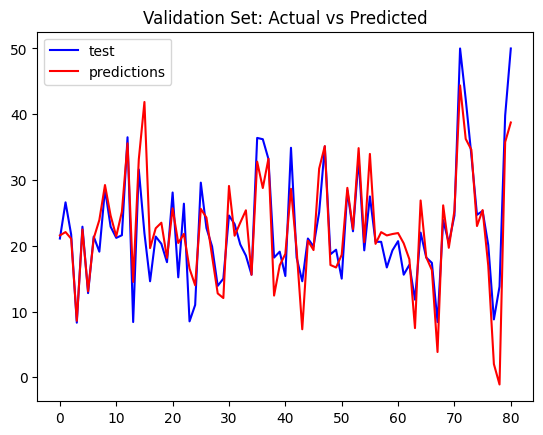

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
train = pd.read_csv("/kaggle/input/dataset/train.csv")
test = pd.read_csv("/kaggle/input/dataset/test.csv")

# Features and target
X = train.drop('MEDV', axis=1).values
y = train['MEDV'].values                                               

# Train/validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Validation performance
y_pred = model.predict(X_test)
print("Validation R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Train on full training set
model.fit(X, y)

# Predict on test set
test_features = test.drop('id',axis=1).values
test_preds = model.predict(test_features)

# Prepare submission
submission = pd.DataFrame({
    'Id': test['id'],
    'MEDV': test_preds
})

submission.to_csv("submission.csv", index=False)
print("\nFinal submission file created: submission.csv")
print(submission.head())


print("\n")
plt.plot(y_test, color = 'blue', label = 'test')
plt.plot(y_pred, color = 'red', label = 'predictions')
plt.title("Validation Set: Actual vs Predicted")
plt.legend()
plt.show()
